In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, widgets, Button, Output

In [2]:
# Load the dataset
df = pd.read_excel('new_customers.xlsx')

## Exploratory Data Analysis (EDA)

In [3]:
# Display the first few rows of the dataset
df.head()

,First Name,Last Name,Full Name,Gender,Past_3_years_bike_related_purchases,DOB,Job Title,Job Industry Category,Wealth Segment,Deceased Indicator,Owns car,Tenure,Address,Postcode,State,Country,Property Valuation,Rank,Value
0,Regine,Bownes,Regine Bownes,Female,99,1952-07-01,Senior Developer,Retail,Affluent Customer,N,No,15,255 Loeprich Lane,3752,VIC,Australia,9,166,1.175000
1,Theresa,Cowper,Theresa Cowper,Female,99,1976-08-24,Accountant III,Manufacturing,Mass Customer,N,No,3,88 Mifflin Pass,2529,NSW,Australia,10,271,1.060000
2,Pace,Clemonts,Pace Clemonts,Male,99,1990-07-28,Media Manager IV,Retail,High Net Worth,N,No,10,335 Cambridge Hill,3122,VIC,Australia,7,358,0.980000
3,Irvine,Headon,Irvine Headon,Male,99,1956-04-21,Geologist III,IT,Affluent Customer,N,Yes,20,9 Hovde Way,2322,NSW,Australia,5,473,0.884000
4,Sammy,Borsi,Sammy Borsi,Female,99,1972-04-27,Accountant III,Financial Services,Mass Customer,N,No,5,0 Kipling Way,2289,NSW,Australia,7,546,0.823438


In [4]:
# Check the summary statistics of the numerical columns
df.describe()

,Past_3_years_bike_related_purchases,Tenure,Postcode,Property Valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.087000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.613477,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,7.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [5]:
# Check the data types of columns
df.dtypes

First Name                                     object
Last Name                                      object
Full Name                                      object
Gender                                         object
Past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
Job Title                                      object
Job Industry Category                          object
Wealth Segment                                 object
Deceased Indicator                             object
Owns car                                       object
Tenure                                          int64
Address                                        object
Postcode                                        int64
State                                          object
Country                                        object
Property Valuation                              int64
Rank                                            int64
Value                       

In [6]:
# Check for missing values
df.isnull().sum()

First Name                               0
Last Name                               29
Full Name                                0
Gender                                   0
Past_3_years_bike_related_purchases      0
DOB                                     17
Job Title                              106
Job Industry Category                  165
Wealth Segment                           0
Deceased Indicator                       0
Owns car                                 0
Tenure                                   0
Address                                  0
Postcode                                 0
State                                    0
Country                                  0
Property Valuation                       0
Rank                                     0
Value                                    0
dtype: int64

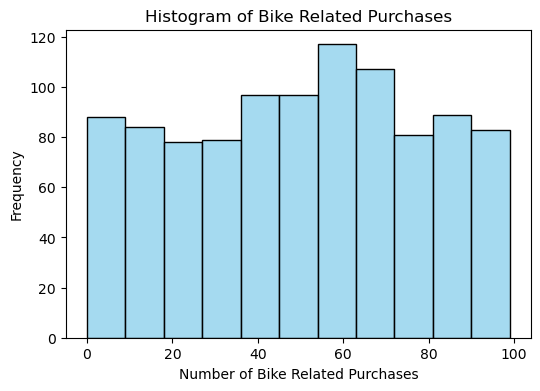

In [7]:
# Histogram of the 'Past_3_years_bike_related_purchases' column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Past_3_years_bike_related_purchases', color='skyblue')
plt.xlabel('Number of Bike Related Purchases')
plt.ylabel('Frequency')
plt.title('Histogram of Bike Related Purchases')
plt.show()

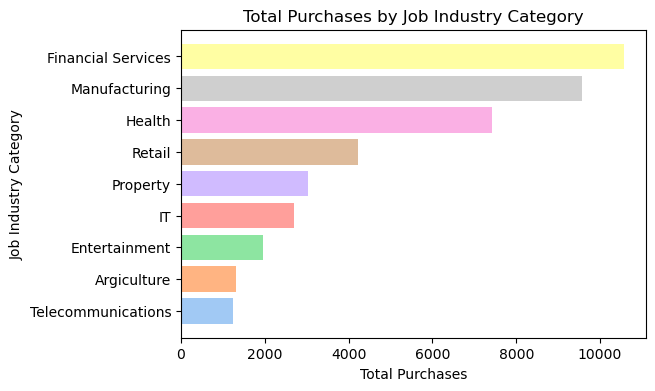

In [8]:
# Calculate the total purchases for each job industry category
total_purchases = df.groupby('Job Industry Category')['Past_3_years_bike_related_purchases'].sum()

# Sort the job industry categories by total purchases in descending order
sorted_categories = total_purchases.sort_values(ascending=True)

# Define a color palette
custom_palette = sns.color_palette('pastel')

# Horizontal bar chart with custom colors
plt.figure(figsize=(6, 4))
plt.barh(sorted_categories.index, sorted_categories.values, color=custom_palette)
plt.xlabel('Total Purchases')
plt.ylabel('Job Industry Category')
plt.title('Total Purchases by Job Industry Category')
plt.show()

In [9]:
# Sort the dataset by Customer Past_3_years_bike_related_purchases in descending order
df_sorted = df.sort_values('Past_3_years_bike_related_purchases', ascending=False)

# Get the top 100 customers
top_100_customers = df_sorted.head()

# Display insights about the top 100 customers
top_100_customers

,First Name,Last Name,Full Name,Gender,Past_3_years_bike_related_purchases,DOB,Job Title,Job Industry Category,Wealth Segment,Deceased Indicator,Owns car,Tenure,Address,Postcode,State,Country,Property Valuation,Rank,Value
0,Regine,Bownes,Regine Bownes,Female,99,1952-07-01,Senior Developer,Retail,Affluent Customer,N,No,15,255 Loeprich Lane,3752,VIC,Australia,9,166,1.175000
5,Wylie,Huntingdon,Wylie Huntingdon,Male,99,1966-08-11,VP Quality Control,Financial Services,Mass Customer,N,No,15,08822 Duke Road,2763,NSW,Australia,8,676,0.701250
8,Clarine,Piecha,Clarine Piecha,Female,99,1964-12-07,Dental Hygienist,Health,High Net Worth,N,No,14,7523 Eggendart Hill,4151,QLD,Australia,10,865,0.550000
7,Mikol,Eck,Mikol Eck,Male,99,1975-07-25,VP Marketing,Financial Services,Mass Customer,N,Yes,21,15621 Twin Pines Crossing,4130,QLD,Australia,9,748,0.650781
6,Cissiee,Baylis,Cissiee Baylis,Female,99,1951-07-22,Cost Accountant,Financial Services,High Net Worth,N,No,16,18 Dottie Park,2230,NSW,Australia,6,700,0.687500


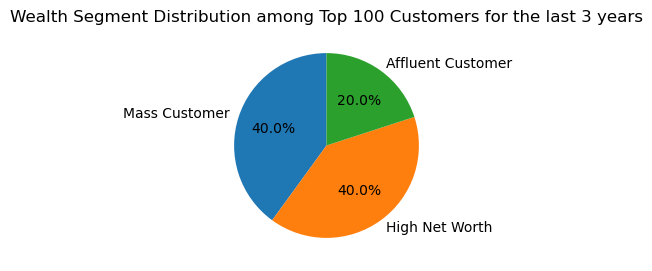

In [10]:
# Pie chart of Wealth Segment distribution among the top 100 customers
wealth_segment_counts = top_100_customers['Wealth Segment'].value_counts()
labels = wealth_segment_counts.index
sizes = wealth_segment_counts.values

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Wealth Segment Distribution among Top 100 Customers for the last 3 years')
plt.show()

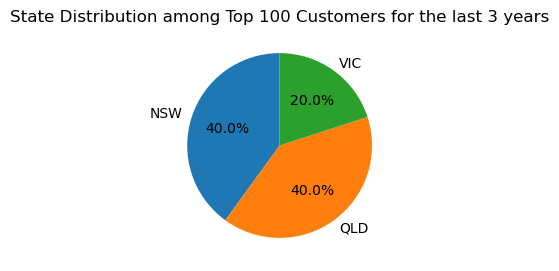

In [11]:
# Pie chart of State distribution among the top 100 customers
state_counts = top_100_customers['State'].value_counts()
labels = state_counts.index
sizes = state_counts.values

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('State Distribution among Top 100 Customers for the last 3 years')
plt.show()

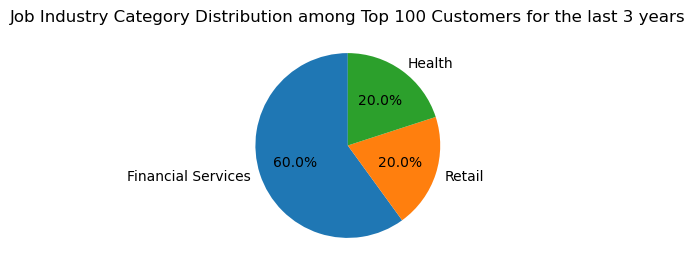

In [12]:
# Pie chart of Job Industry Category distribution among the top 100 customers
job_industry_counts = top_100_customers['Job Industry Category'].value_counts()
labels = job_industry_counts.index
sizes = job_industry_counts.values

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Job Industry Category Distribution among Top 100 Customers for the last 3 years')
plt.show()

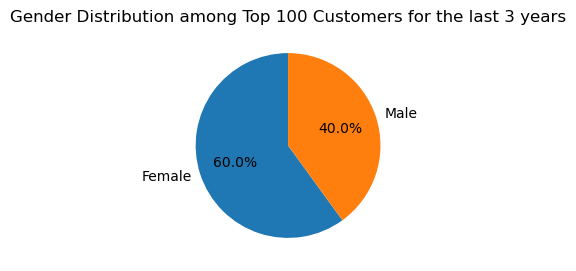

In [13]:
# Pie chart of Gender distribution among the top 100 customers
gender_counts = top_100_customers['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution among Top 100 Customers for the last 3 years')
plt.show()

## Data Preprocessing

In [14]:
# Drop irrelevant columns or columns with leakage of information
non_numeric_columns = ['First Name', 'Last Name', 'Full Name', 'Job Title', 'Job Industry Category', 'Wealth Segment',
                       'Rank', 'Gender', 'DOB', 'Address', 'Postcode', 'State', 'Country', 'Deceased Indicator']
df = df.drop(non_numeric_columns, axis=1)

In [15]:
# Encoding the categorical variable Owns car
df = pd.get_dummies(df, columns=['Owns car'])

In [16]:
df.head()

,Past_3_years_bike_related_purchases,Tenure,Property Valuation,Value,Owns car_No,Owns car_Yes
0,99,15,9,1.175000,1,0
1,99,3,10,1.060000,1,0
2,99,10,7,0.980000,1,0
3,99,20,5,0.884000,0,1
4,99,5,7,0.823438,1,0


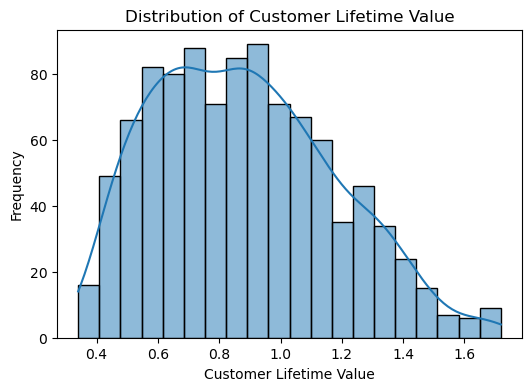

In [17]:
# Visualizations
# Histogram of 'Value'
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Value', bins=20, kde=True)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Lifetime Value')
plt.show()

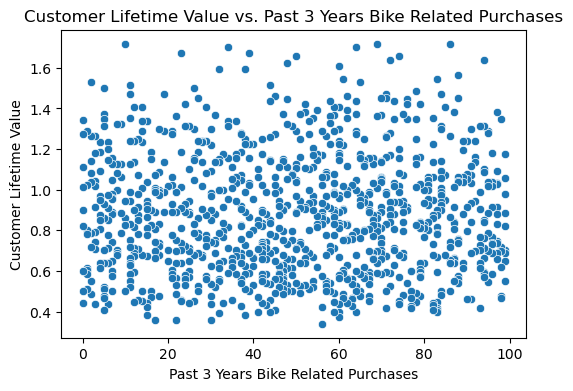

In [18]:
# Scatter plot of 'Past_3_years_bike_related_purchases' vs. 'Value'
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Past_3_years_bike_related_purchases', y='Value')
plt.xlabel('Past 3 Years Bike Related Purchases')
plt.ylabel('Customer Lifetime Value')
plt.title('Customer Lifetime Value vs. Past 3 Years Bike Related Purchases')
plt.show()

In [19]:
# Split the data into features and target variable
features = ['Past_3_years_bike_related_purchases', 'Tenure', 'Property Valuation', 'Owns car_No', 'Owns car_Yes']
target = 'Value'  # Customer Lifetime Value column

X = df[features]
y = df[target]

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [20]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Model Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print('Training Set:')
print('Mean Squared Error:', train_mse)
print('Root Mean Squared Error:', train_rmse)
print('R-squared:', train_r2)

print('\nTesting Set:')
print('Mean Squared Error:', test_mse)
print('Root Mean Squared Error:', test_rmse)
print('R-squared:', test_r2)

Training Set:
Mean Squared Error: 0.0844019214482783
Root Mean Squared Error: 0.2905200878567234
R-squared: 0.0048391143440580375

Testing Set:
Mean Squared Error: 0.09280632322548087
Root Mean Squared Error: 0.30464130256004496
R-squared: -0.01898232393786725


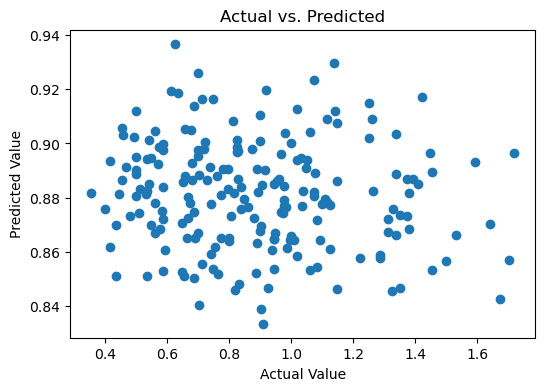

In [23]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted')
plt.show()

In [24]:
# Make predictions on new data
new_data = pd.DataFrame([[99, 15, 9, 1, 0], [89, 13, 12, 0, 1], [93, 10, 10, 0, 1]], columns=features)
predicted_value = model.predict(new_data)
print('Predicted Customer Lifetime Value:', predicted_value)

Predicted Customer Lifetime Value: [0.87759182 0.85037452 0.86850184]


## Dynamic Dashboard for Prediction

In [25]:
# Define a function to make predictions
def predict_value(purchases, tenure, valuation, owns_car):
    # Create a new data point using the input values
    if owns_car == 0:
        new_data = [[purchases, tenure, valuation, 0, 1]]
    else:
        new_data = [[purchases, tenure, valuation, 1, 0]]
        
    # Create a DataFrame with the feature names
    new_data_df = pd.DataFrame(new_data, columns=features)
    
    # Predict the target value for the new data point
    predicted_value = model.predict(new_data_df)
    
    # Return the predicted value
    return predicted_value[0]

# Define a function to handle button click event
def on_button_click(b):
    # Get the current values from the input widgets
    purchases = purchases_widget.value
    tenure = tenure_widget.value
    valuation = valuation_widget.value
    owns_car = owns_car_widget.value
    
    # Predict the target value using the current input values
    predicted_value = predict_value(purchases, tenure, valuation, owns_car)
    
    # Clear the output area and display the predicted value
    with output:
        output.clear_output()
        print(f'Predicted Value: {predicted_value}')

# Create interactive widgets for each input feature
purchases_widget = widgets.IntSlider(min=0, max=100, step=1, value=50, description='Purchases:')
tenure_widget = widgets.IntSlider(min=0, max=25, step=1, value=5, description='Tenure:')
valuation_widget = widgets.IntSlider(min=0, max=25, step=1, value=50, description='Valuation:')
owns_car_widget = widgets.RadioButtons(options=[('No', 0), ('Yes', 1)], description='Owns car:', value=0)

# Create a button widget
button = Button(description='Predict')

# Create an output widget to display the result
output = Output()

# Define the button click event handler
button.on_click(on_button_click)

# Create a layout for the widgets and output
input_widgets = widgets.VBox([purchases_widget, tenure_widget, valuation_widget, owns_car_widget, button])
layout = widgets.VBox([input_widgets, output])

# Display the layout
display(layout)